<a href="https://colab.research.google.com/github/Dhanush-adk/machine_learning/blob/main/Linear_Regression_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [461]:

# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Dhanush-adk/machine_learning/main/D3.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [462]:
df.corr()

,X1,X2,X3,Y
X1,1.000000,-0.007525,0.116157,-0.861120
X2,-0.007525,1.000000,-0.037818,0.235563
X3,0.116157,-0.037818,1.000000,-0.218163
Y,-0.861120,0.235563,-0.218163,1.000000


In [463]:
X1 = df['X1'].to_numpy()
X2 = df['X2'].to_numpy()
X3 = df['X3'].to_numpy()

Y = df['Y'].to_numpy()

In [464]:
theta = np.ones(2)
theta

array([1., 1.])

In [490]:
def add_bias_for_input(X):
    const = np.ones((len(X),1))
    if len(X.shape) == 1:
      X_train = np.append(const, X.reshape(-1,1), axis=1)
      theta = np.ones(2)
    else:
      X_train = np.append(const, X, axis=1)
      theta = np.ones(X.shape[1] + 1)
    return theta, X_train

def Linear_Regression(X, Y, epochs = 1000, learning_rate = 0.01):
    const = np.ones((len(Y),1))
    if len(X.shape) == 1:
      X_train = np.append(const, X.reshape(-1,1), axis=1)
      theta = np.ones(2)
    else:
      X_train = np.append(const, X, axis=1)
      theta = np.ones(X.shape[1] + 1)
    Y_train = np.array(Y)
    m = len(Y_train)  # Number of training examples
    cost_history = []
    for i in range(epochs):
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, Y_train)
        sum_delta = (learning_rate / m) * X_train.transpose().dot(errors)
        theta -= sum_delta
        sqrErrors = np.square(errors)
        j = 1 / (2 * m) * np.sum(sqrErrors)
        cost_history.append(j)
    return theta, cost_history

In [491]:
theta_x1, cost_history_1 = Linear_Regression(X1, Y)
theta_x2, cost_history_2 = Linear_Regression(X2, Y)
theta_x3, cost_history_3 = Linear_Regression(X3, Y)
theta_x4, cost_history_4 = Linear_Regression(X1, Y, learning_rate=0.1)
theta_x5, cost_history_5 = Linear_Regression(X2, Y, learning_rate=0.1 )
theta_x6, cost_history_6 = Linear_Regression(X3, Y, learning_rate=0.1)

In [492]:
theta_x1

array([ 5.35065293, -1.81365012])

In [493]:
theta_x2

array([0.74472994, 0.55423336])

In [494]:
theta_x3

array([ 2.64623671, -0.43142334])

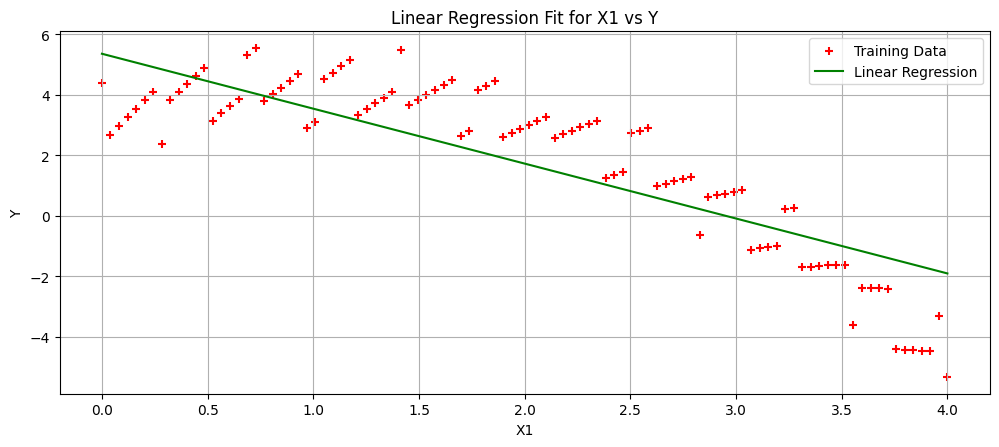

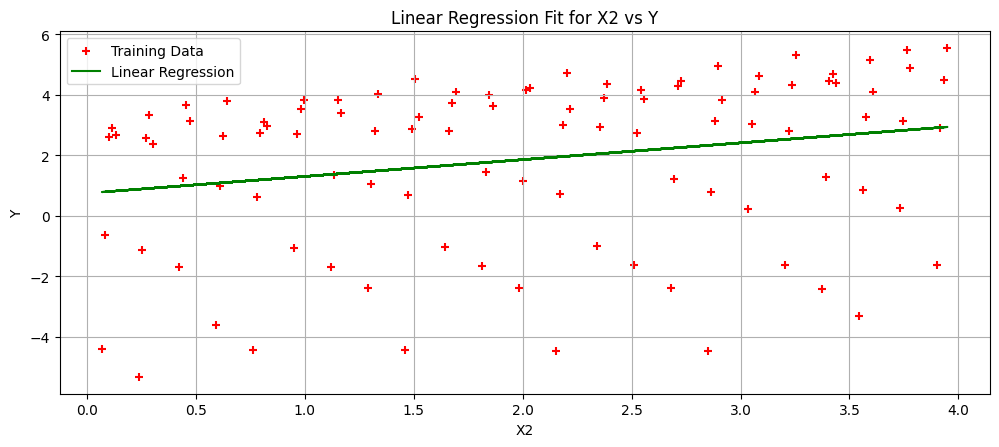

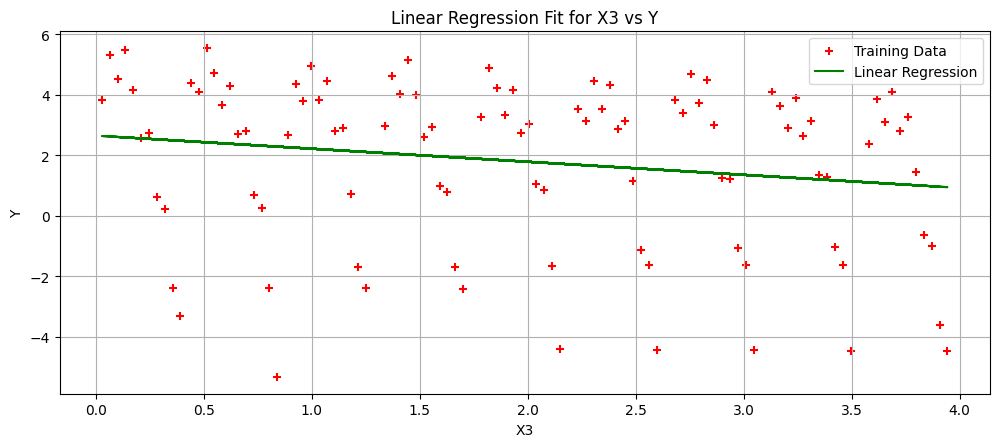

In [532]:
_,X1_data = add_bias_for_input(X1)
_,X2_data = add_bias_for_input(X2)
_,X3_data = add_bias_for_input(X3)

# Scatter plot for the training data
plt.figure(figsize=(12, 16))
plt.subplot(3,1, 1)
plt.scatter(df['X1'], df['Y'], color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(df['X1'], X1_data.dot(theta_x1), color='green', label='Linear Regression')

plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit for X1 vs Y')
plt.legend()

plt.figure(figsize=(12, 16))
plt.subplot(3,1, 2)
plt.scatter(df['X2'], df['Y'], color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(df['X2'], X2_data.dot(theta_x2), color='green', label='Linear Regression')

plt.grid(True)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit for X2 vs Y')
plt.legend()

plt.figure(figsize=(12, 16))
plt.subplot(3,1, 3)
plt.scatter(df['X3'], df['Y'], color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(df['X3'], X3_data.dot(theta_x3), color='green', label='Linear Regression')

plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit for X3 vs Y')
plt.legend()


# Show the plot
plt.show()


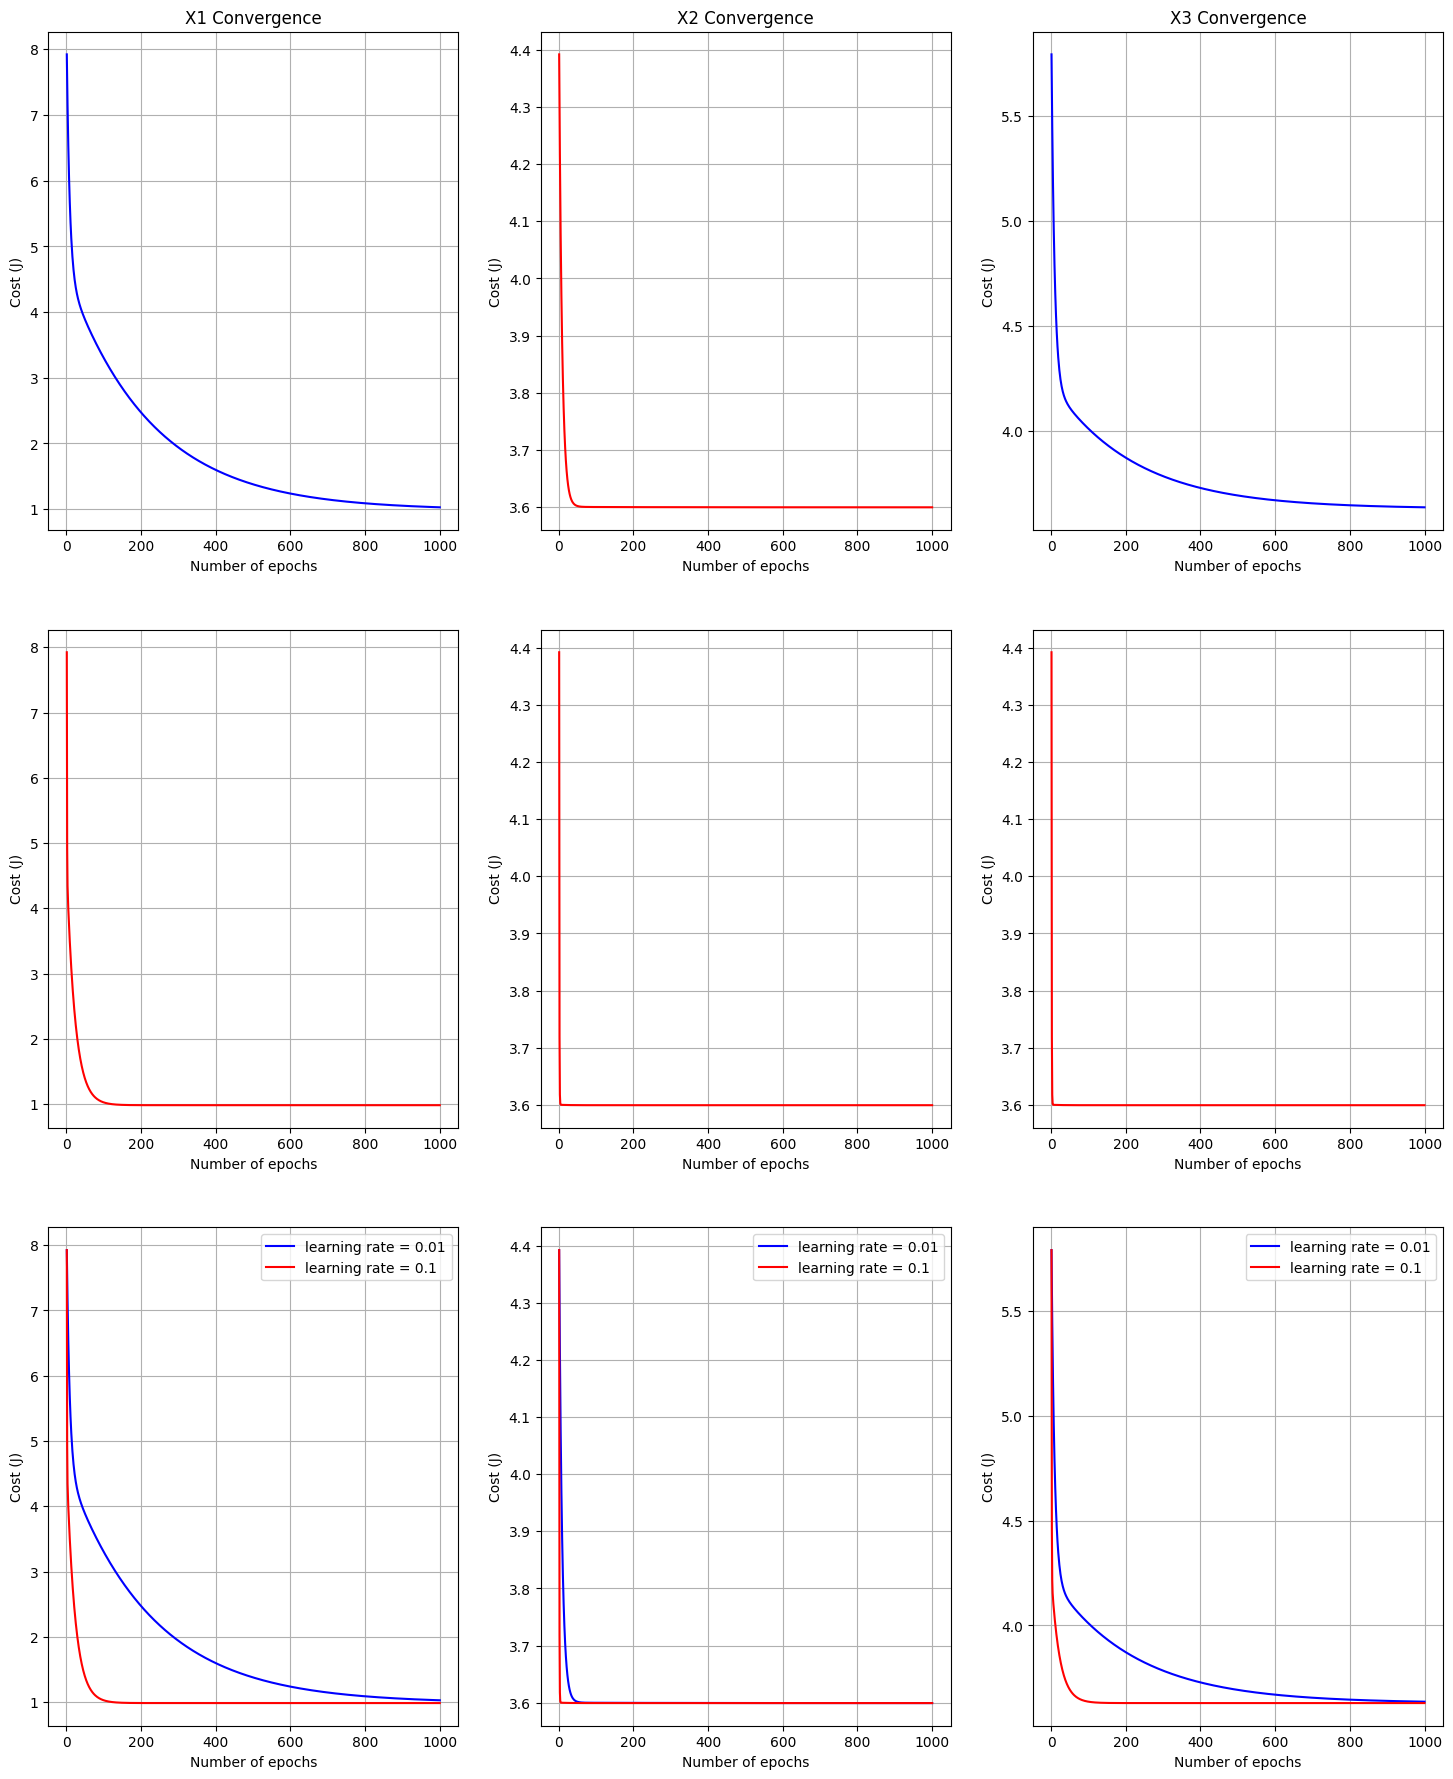

In [497]:
plt.figure(figsize=(18, 22))
plt.subplot(3, 3, 1)

plt.plot(range(1, len(cost_history_1) + 1), cost_history_1, color='blue', label = 'X1')

plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.title('X1 Convergence')
plt.grid()

plt.subplot(3, 3, 2)
plt.plot(range(1, len(cost_history_1)  + 1), cost_history_2, color='red', label = 'X2')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.title('X2 Convergence')
plt.grid()

plt.subplot(3, 3, 3)
plt.plot(range(1, len(cost_history_1) + 1), cost_history_3, color='blue', label = 'X3')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.title('X3 Convergence')
plt.grid()

plt.subplot(3, 3, 4)
plt.plot(range(1, len(cost_history_1) + 1), cost_history_4, color='red', label = 'X1')

plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.grid()

plt.subplot(3, 3, 5)
plt.plot(range(1, len(cost_history_1)  + 1), cost_history_5, color='red', label = 'X2')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.grid()

plt.subplot(3, 3, 6)
plt.plot(range(1, len(cost_history_1)  + 1), cost_history_5, color='red', label = 'X3')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.grid()


plt.subplot(3, 3, 7)
plt.plot(range(1, len(cost_history_1) + 1), cost_history_1, color='blue', label = 'learning rate = 0.01')
plt.plot(range(1, len(cost_history_1) + 1), cost_history_4, color='red', label = 'learning rate = 0.1')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.grid()
plt.legend()


plt.subplot(3, 3, 8)
plt.plot(range(1, len(cost_history_1) + 1), cost_history_2, color='blue', label = 'learning rate = 0.01')
plt.plot(range(1, len(cost_history_1) + 1), cost_history_5, color='red', label = 'learning rate = 0.1')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.grid()
plt.legend()

plt.subplot(3, 3, 9)
plt.plot(range(1, len(cost_history_1) + 1), cost_history_3, color='blue', label = 'learning rate = 0.01')
plt.plot(range(1, len(cost_history_1) + 1), cost_history_6, color='red', label = 'learning rate = 0.1')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.grid()
plt.legend()

# Show the plot
plt.show()

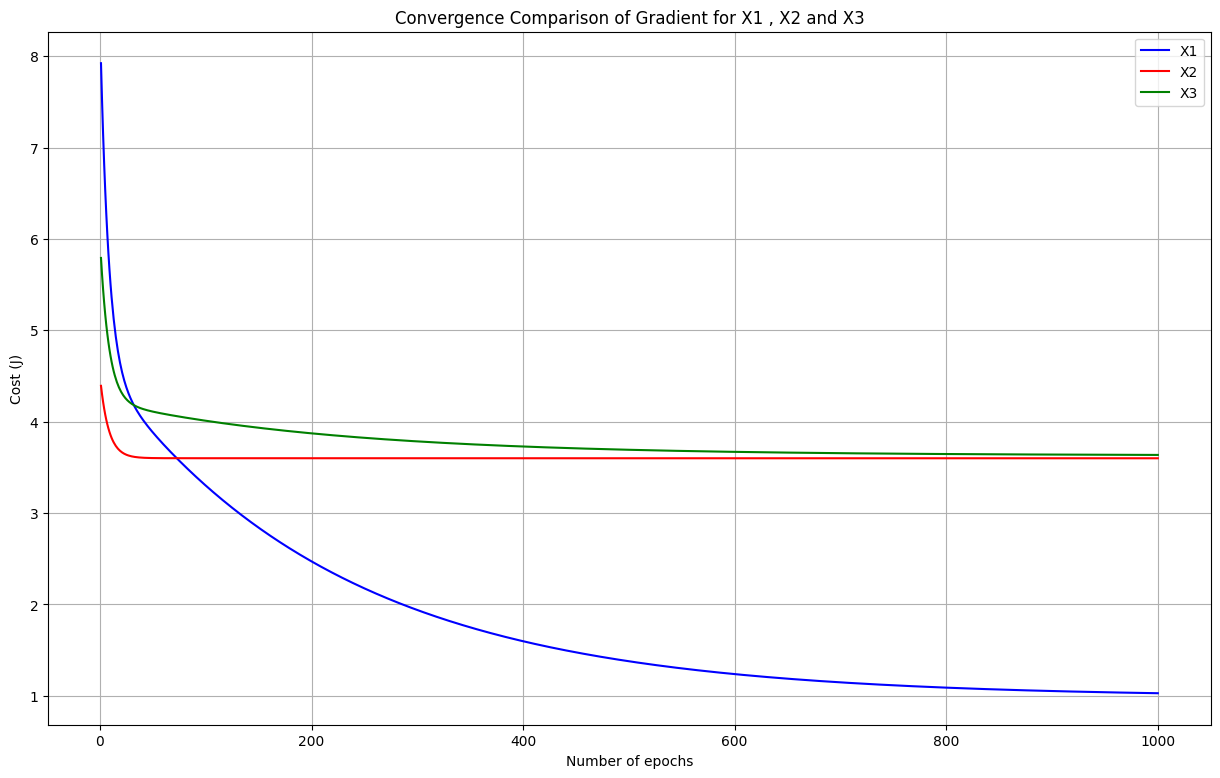

In [498]:
plt.figure(figsize=(15, 9))

plt.plot(range(1, len(cost_history_1) + 1), cost_history_1, color='blue', label = 'X1')
plt.plot(range(1, len(cost_history_1)  + 1), cost_history_2, color='red', label = 'X2')
plt.plot(range(1, len(cost_history_1) + 1), cost_history_3, color='green', label = 'X3')

plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.grid()
plt.title('Convergence Comparison of Gradient for X1 , X2 and X3')
plt.legend()
# Show the plot
plt.show()

In [499]:
X_input =  df.drop('Y', axis = 1).to_numpy()

In [609]:
theta_X_123, cost_history_123  = Linear_Regression(X_input, Y, epochs = 2000)
theta_X_123_alpha, cost_history_123_alpha  = Linear_Regression(X_input, Y, learning_rate=0.1, epochs = 2000)

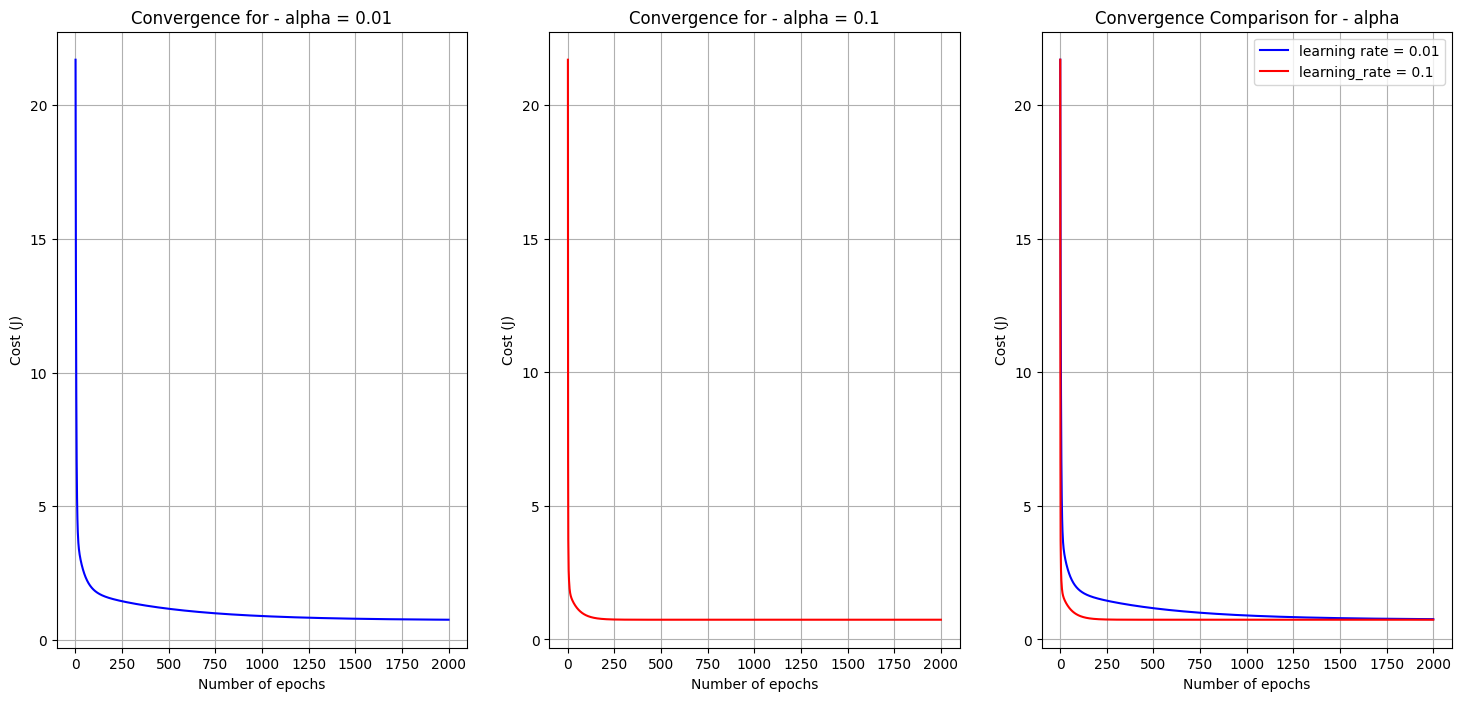

In [610]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)

plt.plot(range(1, len(cost_history_123) + 1), cost_history_123, color='blue', label = 'X1')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.title('Convergence for - alpha = 0.01')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(range(1, len(cost_history_123)  + 1), cost_history_123_alpha, color='red', label = 'X2')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.title('Convergence for - alpha = 0.1')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(range(1, len(cost_history_123)  + 1), cost_history_123, color='blue', label = 'learning rate = 0.01')
plt.plot(range(1, len(cost_history_123)  + 1), cost_history_123_alpha, color='red', label = 'learning_rate = 0.1')
plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.title('Convergence Comparison for - alpha')
plt.grid()
plt.legend()

plt.show()

In [611]:
add_bias_for_input(i.reshape(-1,1))[1].shape

(3, 2)

In [612]:
theta_X_123

array([ 4.67746747, -1.9137749 ,  0.63777402, -0.17227463])

In [613]:
theta_X_123_alpha

array([ 5.31416716, -2.00371927,  0.53256334, -0.26560186])

In [614]:
# New input features
X_new = np.array([[1,1,1], [2, 0, 4], [3, 2, 1]])  # Add the bias term (1) as the first element
_, X_bias = add_bias_for_input(X_new)
# Predictions
predictions = X_bias.dot(theta_X_123)

# The 'predictions' array now contains the predicted Y values for the new input features
print(predictions)


[3.22919196 0.16081915 0.03941618]


the following predictions are with alpha = 0.1 and epochs = 2k

In [616]:
# New input features
X_new = np.array([[1,1,1], [2, 0, 4], [3, 2, 1]])  # Add the bias term (1) as the first element
_, X_bias = add_bias_for_input(X_new)
# Predictions
predictions = X_bias.dot(theta_X_123_alpha)

# The 'predictions' array now contains the predicted Y values for the new input features
print(predictions)


[3.57740937 0.24432117 0.10253417]
